#### Business Understanding

Business Problem:  Bagaimana cara meningkatkan revenue dari penjualan mobil dengan memprediksi harga mobil yang akurat berdasarkan spesifikasi?

Objective: Build a model regresi to predict car price. (numeric continue)

#### Data Cleansing

In [17]:
import pandas as pd

In [19]:
df = pd.read_csv("car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
## Check missing values

In [25]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [27]:
## Check outliers

In [29]:
df_num = df.select_dtypes(["int64", "float64"])
col_num = df_num.columns
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [33]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr 
    fence_low = q1 - 1.5*iqr 
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for car_ID
(0, 26)
Running for symboling
(0, 26)
Running for wheelbase
(3, 26)
Running for carlength
(1, 26)
Running for carwidth
(8, 26)
Running for carheight
(0, 26)
Running for curbweight
(0, 26)
Running for enginesize
(10, 26)
Running for boreratio
(0, 26)
Running for stroke
(20, 26)
Running for compressionratio
(28, 26)
Running for horsepower
(6, 26)
Running for peakrpm
(2, 26)
Running for citympg
(2, 26)
Running for highwaympg
(3, 26)
Running for price
(15, 26)


In [41]:
df.shape 

(205, 26)

In [43]:
df.duplicated().sum()

0

### EDA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [53]:
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [57]:
len(col_num)

16

In [55]:
## Univariate Analysis

In [51]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

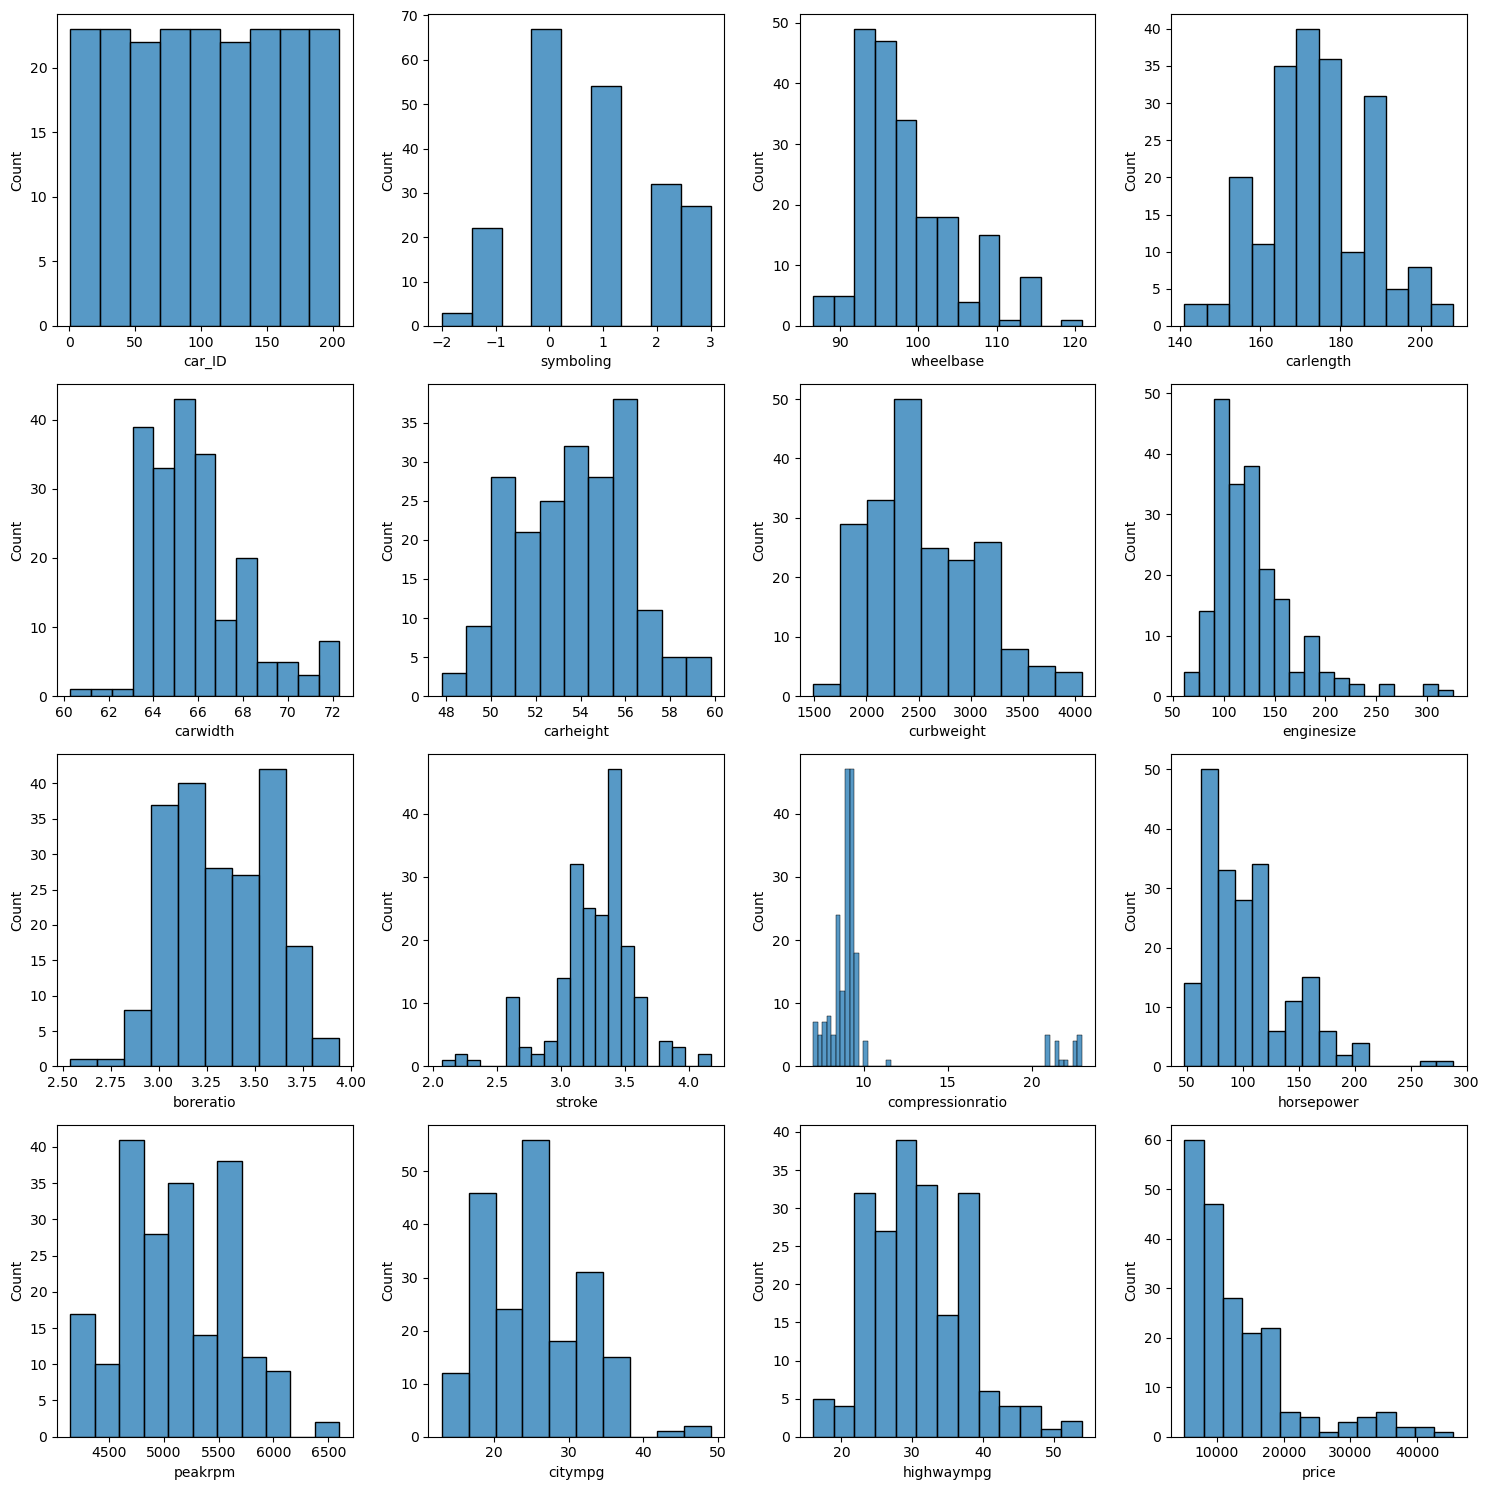

In [63]:
plt.figure(figsize = (15,15))
for i in range (len(col_num)):
    plt.subplot(4,4,i+1)
    sns.histplot(x = col_num[i], data = df)
    plt.tight_layout()

In [65]:
## Multivaraite Analysis

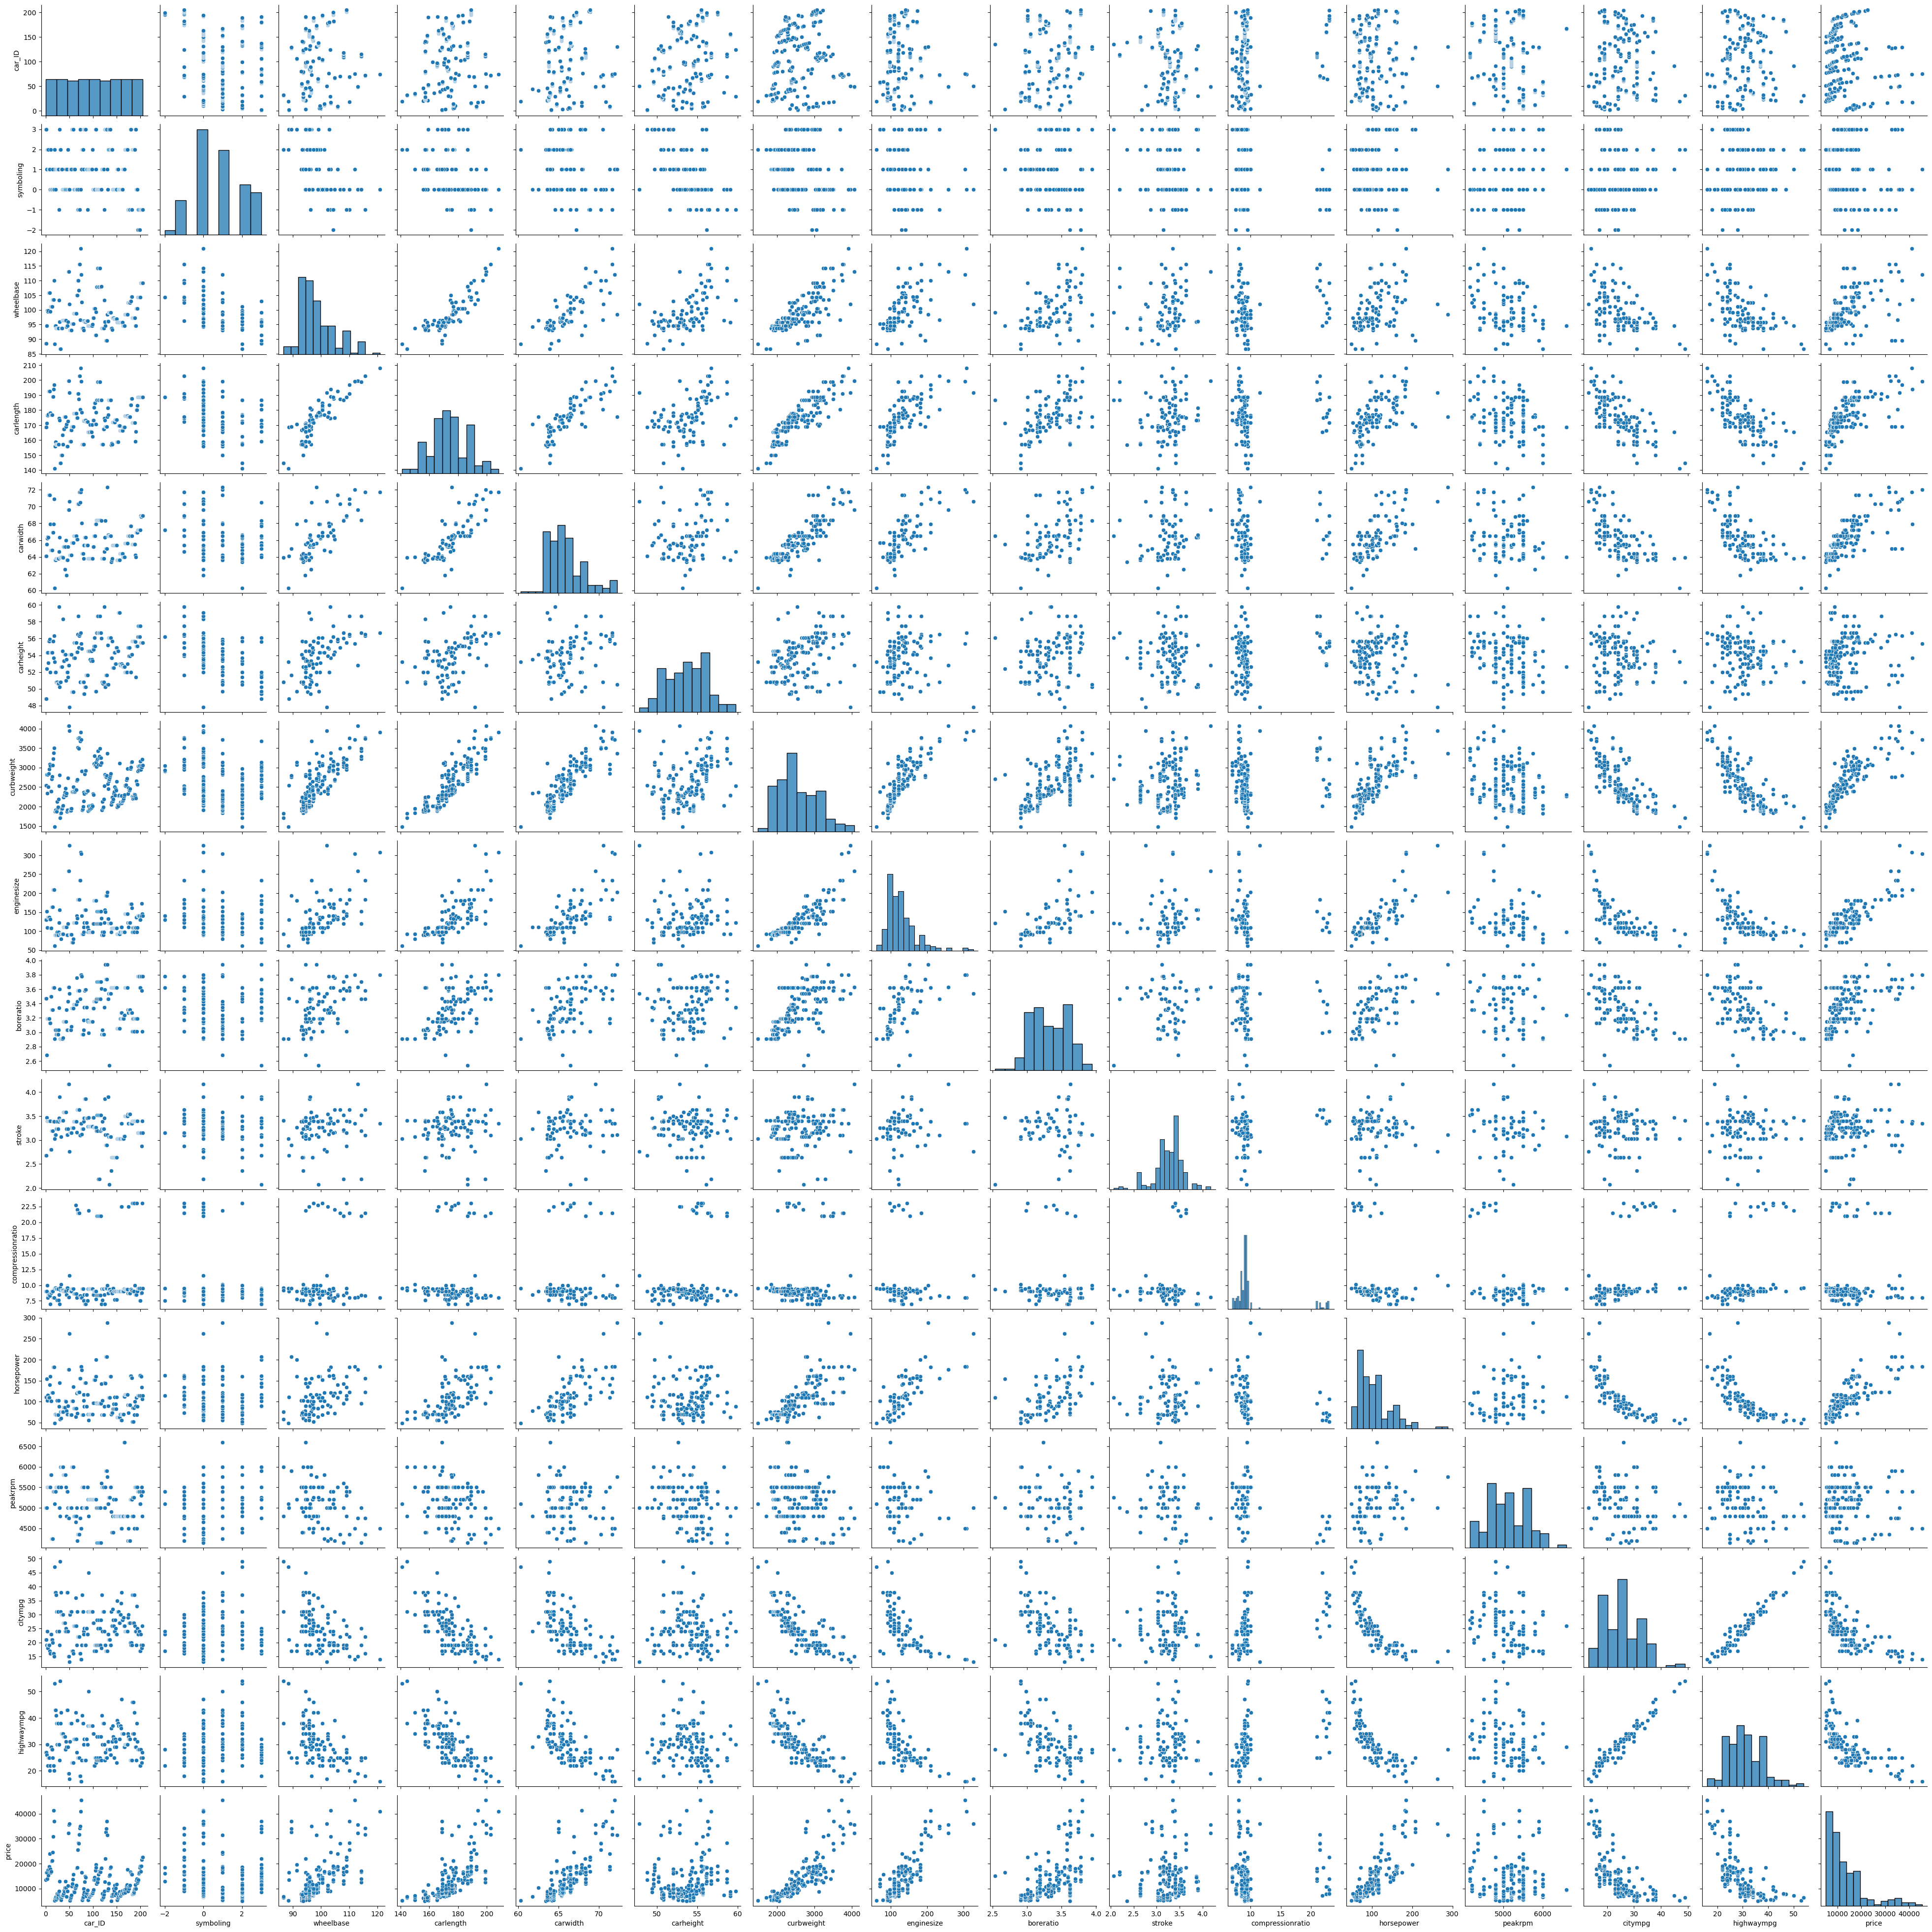

In [69]:
sns.pairplot(df)

In [71]:
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [73]:
filtered_col = col_num[2:10].tolist()
filtered_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke']

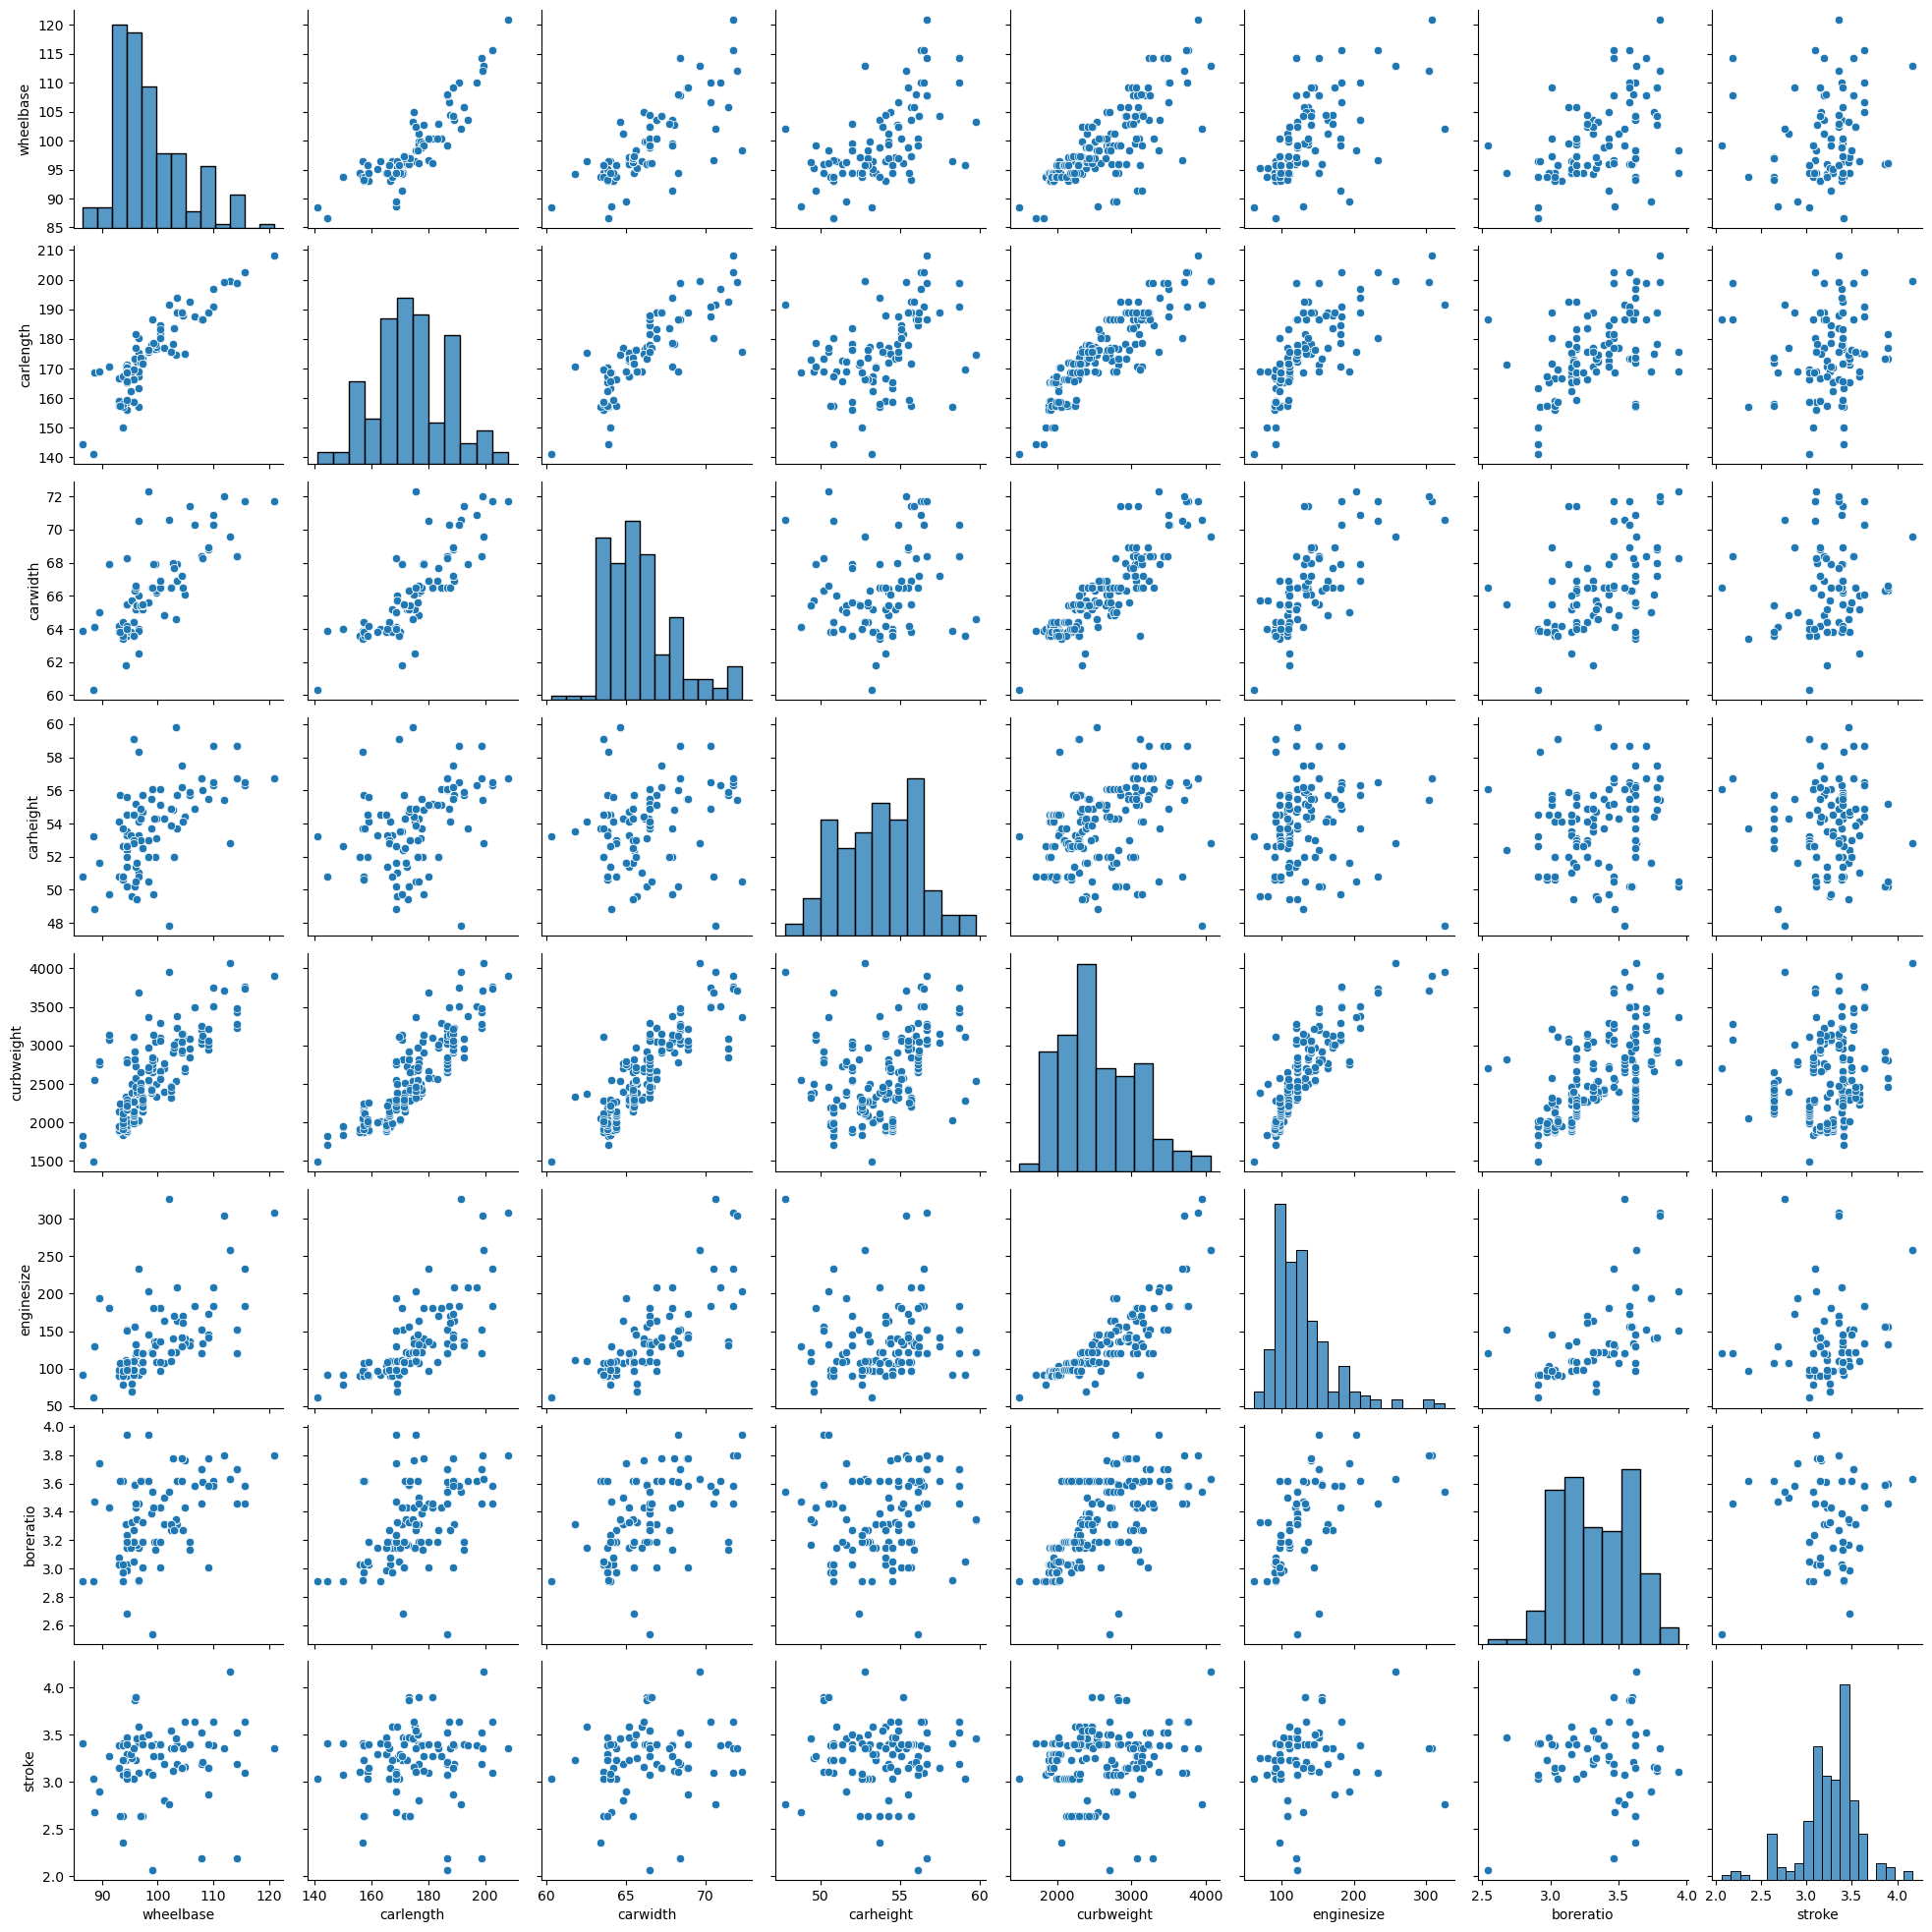

In [75]:
sns.pairplot(df[filtered_col])

<Axes: >

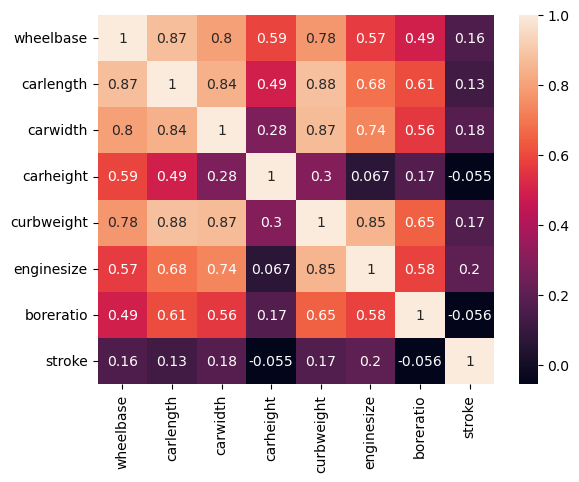

In [81]:
sns.heatmap(df[filtered_col].corr(), annot = True)

#### Additional Data Preparation before Modeling

In [86]:
## feature engineering

In [90]:
df["car_area"] = df["carlength"] * df["carwidth"]

In [96]:
df["car_volume"] =  df["car_area"] * df["carheight"]

In [98]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_volume
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,13008.32,721961.760
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,12989.44,720913.920
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,13008.32,721961.760
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,13008.32,721961.760


In [100]:
## One Hot Encoding

In [102]:
df = df.drop(columns = ["CarName"])

In [104]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_volume
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832


In [118]:
df_obj = df.select_dtypes("object")
col_obj = df_obj.columns.tolist()

In [120]:
col_obj

[]

In [122]:
pd.get_dummies(df, columns = col_obj)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

In [126]:
## Train test split

In [128]:
X = df.drop(columns = ["price"])
y = df["price"]

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 55)
(41, 55)
(164,)
(41,)


#### Modeling & Evaluation

In [138]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [140]:
y_lr = lr.predict(X_test)
y_lr

array([ 6768.28084749,  5072.04724592,  6203.01057117,  7096.11577675,
        6632.51354142, 27264.68451364,  5671.48487642,  1114.51898267,
        6524.1164674 , 11434.23426699, 15726.13936265, 16175.47367742,
       15714.94895789,  8297.10497453, 15452.15846283, 12565.59768813,
        6642.99058618,  7215.09410482, 12307.35398804, 12675.47411961,
        9276.9320858 ,  7267.80123176, 14824.06897449,  6981.67809451,
       12057.32649508,  7265.85663482, 13521.66693771,  8908.12205043,
        5836.03120052,  7425.82364384,  7362.86467643, 11155.15699734,
       29441.03416131, 10815.06274742, 16946.27225382,  8486.08190249,
       11993.34131462, 33496.3368515 , 12730.9439955 , 20708.56042519,
        7097.23569692])

In [142]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_lr)

1856.229142984988

In [144]:
import numpy as np

print(np.mean(y_test))
print(np.std(y_test))

12147.158536585366
7412.862292745469


In [146]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_lr)

2734.1691782364414

In [150]:
from sklearn.metrics import r2_score

r2_score(y_test, y_lr)

0.8639561537832453

In [152]:
y_lr

array([ 6768.28084749,  5072.04724592,  6203.01057117,  7096.11577675,
        6632.51354142, 27264.68451364,  5671.48487642,  1114.51898267,
        6524.1164674 , 11434.23426699, 15726.13936265, 16175.47367742,
       15714.94895789,  8297.10497453, 15452.15846283, 12565.59768813,
        6642.99058618,  7215.09410482, 12307.35398804, 12675.47411961,
        9276.9320858 ,  7267.80123176, 14824.06897449,  6981.67809451,
       12057.32649508,  7265.85663482, 13521.66693771,  8908.12205043,
        5836.03120052,  7425.82364384,  7362.86467643, 11155.15699734,
       29441.03416131, 10815.06274742, 16946.27225382,  8486.08190249,
       11993.34131462, 33496.3368515 , 12730.9439955 , 20708.56042519,
        7097.23569692])

In [154]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
Name: price, dtype: float64

In [166]:
y_diff = y_test - y_lr
y_diff_below_threshold = [x for x in y_diff if (x < 0.5*7412.862292745469) and (x > - 0.5*7412.862292745469)]

In [168]:
y_diff_below_threshold

[-99.28084748669062,
 2926.952754083177,
 134.9894288343785,
 1820.3842232456955,
 3662.486458577012,
 -1712.6845136370102,
 2577.5151235754893,
 -36.116467404033756,
 -1189.2342669949576,
 1723.8606373543153,
 1493.526322579477,
 800.0510421122308,
 797.8950254701194,
 -2488.158462829888,
 -1366.5976881268143,
 3337.009413820837,
 -686.0941048198729,
 -1416.4741196080868,
 -328.9320858041756,
 -412.80123175829067,
 2100.9310255093733,
 975.3219054882356,
 -2068.3264950806624,
 -136.85663481563097,
 967.3330622926878,
 -913.1220504289377,
 392.9687994795386,
 -130.8236438400054,
 695.135323573777,
 -2234.1569973430014,
 -1520.0627474160574,
 1003.727746178658,
 -711.0819024856901,
 -3435.3413146184466,
 -1246.3368514977046,
 2914.05600450412,
 1916.439574812015,
 -1979.2356969160028]

In [170]:
len(y_diff_below_threshold)

38

In [172]:
38/41

0.926829268292683

#### Business Conclusion

Business Impact

Final model = Linear Regression

MAE = 1,856

RMSE=2,734

Assume untuk setiap 100 mobil that we have

1. Before the model:
    - Kita tidak tahu prediksi harga mobil yang akurat.
    - Perikiraan hanya 50% mobil yang terjual, 50 mobil.
2. After the model:
    - Kita tahu harga mobil yang akurat yang mendekati harga pasar.
    - Asumsi harga mobil yang akurat dengan error/diff.
    - 38/41 = 92% akurat dari semua mobil.
    - Mobil yang terjual 92%, 92 mobil.
